Epoch 1/10
938/938 [==============================] - 37s 38ms/step - loss: 0.5099 - accuracy: 0.8216 - val_loss: 0.3203 - val_accuracy: 0.8897
Epoch 2/10
938/938 [==============================] - 33s 35ms/step - loss: 0.3512 - accuracy: 0.8747 - val_loss: 0.2757 - val_accuracy: 0.9004
Epoch 3/10
938/938 [==============================] - 30s 32ms/step - loss: 0.3102 - accuracy: 0.8888 - val_loss: 0.2561 - val_accuracy: 0.9088
Epoch 4/10
938/938 [==============================] - 30s 33ms/step - loss: 0.2847 - accuracy: 0.8971 - val_loss: 0.2497 - val_accuracy: 0.9091
Epoch 5/10
938/938 [==============================] - 32s 34ms/step - loss: 0.2661 - accuracy: 0.9042 - val_loss: 0.2423 - val_accuracy: 0.9125
Epoch 6/10
938/938 [==============================] - 32s 34ms/step - loss: 0.2492 - accuracy: 0.9085 - val_loss: 0.2365 - val_accuracy: 0.9133
Epoch 7/10
938/938 [==============================] - 30s 32ms/step - loss: 0.2338 - accuracy: 0.9141 - val_loss: 0.2410 - val_accuracy:

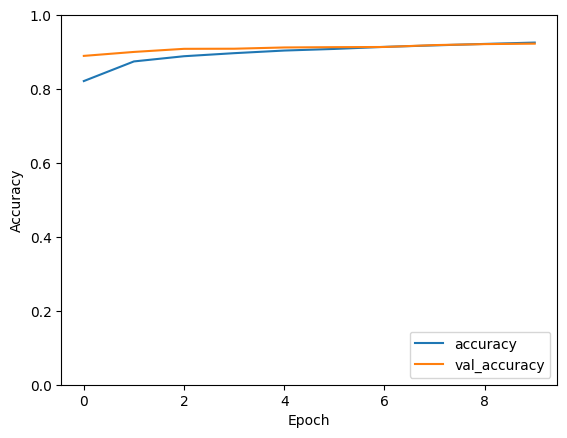

1/1 [==============================] - 0s 67ms/step


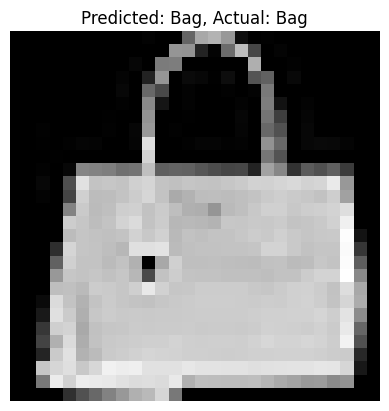

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the train and test data from CSV files
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Separate features and labels
x_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(train_data['label'].values, 10)

x_test = test_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1).astype('float32') / 255
y_test = to_categorical(test_data['label'].values, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


1/1 [==============================] - 0s 23ms/step


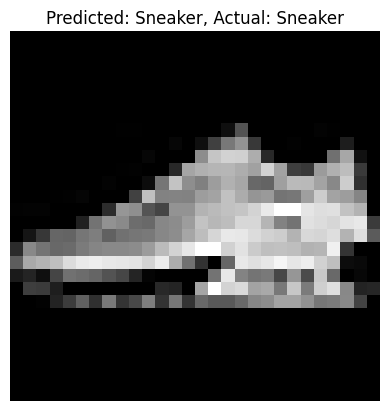

In [12]:
# Choose a random image from the test set
index = np.random.randint(0, len(x_test))
test_image = x_test[index].reshape(1, 28, 28, 1)

# Make prediction
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)
actual_class = np.argmax(y_test[index])

# Define class labels
class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Show the image and its predicted value
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {class_labels[predicted_class]}, Actual: {class_labels[actual_class]}")
plt.axis('off')
plt.show()
